<a href="https://colab.research.google.com/github/hthomas229/PurpleCrown/blob/main/glass_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression: Glass Dataset & SciKitLearn

We will perform linear regression on the Glass data set from the R package mlbench.  We will use both single independent and multiple independent variables and various regression algorithms to see how well we can predict the refractive index of different glass types.

Hope you learn something.

Have Fun!

H

#Install the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Get Data  & Explore
*Glass is from the R mlbench package*

### Read data from csv

In [2]:
df = pd.read_csv('/content/Glass.csv')
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


### Check for missingness and check datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


We have 9 float types for the various glass features and one integer type for the glass type


Na	Sodium
Mg	Magnesium
Al	Aluminum
Si	Silicon
K	Potassium
Ca	Calcium
Ba	Barium
Fe	Iron

RI - Refractive index

In [4]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


No NaNs so we don't need to worry about missingness.

###Explore data -- summary statitics & correlation

Taka a peak at the summary statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


It is aways important to visualize the realtionships in your data. So, let's plot the correlations using Seaborn.

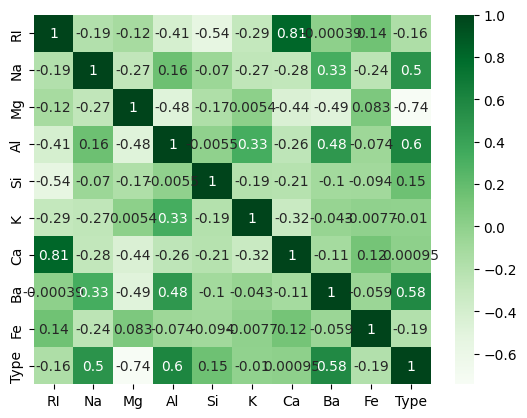

In [6]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

We want to use Refractive Index as the dependent variable (y)

We see a strong correlation (.81) between RI and calcium.
Let's try barium as the independent variable first.

###Subset and Split the Data for Training and Testing

In [7]:
df2 = df[['Ca', 'RI']]
df2.head()

,Ca,RI
0,8.75,1.52101
1,7.83,1.51761
2,7.78,1.51618
3,8.22,1.51766
4,8.07,1.51742


Let's look further into the relationship between  calcium(Ca) annd Refractive Index (RI)

<Axes: xlabel='Ca', ylabel='RI'>

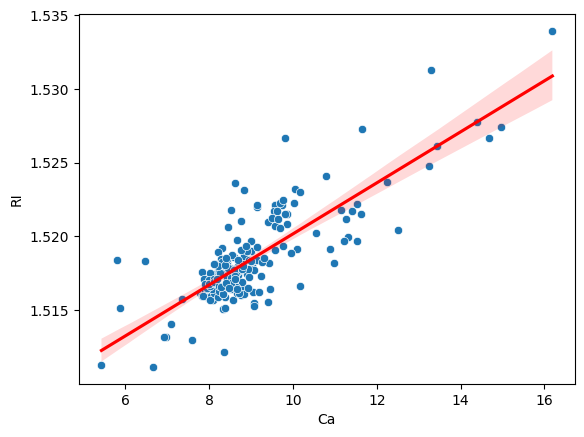

In [8]:
sns.scatterplot(x='Ca', y='RI', data=df2)
sns.regplot(x='Ca', y='RI', data=df2, scatter=False, color='red')

Calcium does appear to be a good choice for the independent variable.

Separate df2 into independent (X) and dependent (y) variables.

In [9]:
X =np.array(df2['Ca']).reshape(-1, 1)
y =np.array(df2['RI']).reshape(-1, 1)

In [10]:
X.shape, y.shape

((214, 1), (214, 1))

Split the data inot training and test datasets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 1), (43, 1), (171, 1), (43, 1))

#Build Our First Model

### Create the Model, Fit, Make Predictions & Evaluate

Instantiate the LinearRegression Model from scikitLearn

In [13]:
model_lr = LinearRegression()

Fit the model

In [14]:
model_lr.fit(X_train, y_train)

LinearRegression()

Make predictions

In [15]:
y_pred = model_lr.predict(X_test)

Evaluate the model

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import r2_score, mean_absolute_error and mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.6879869650387724
Mean Absolute Error (MAE): 0.0013110778938730935
Mean Squared Error (MSE): 2.608554587475014e-06


Here's a breakdown of the results:

**R-squared (0.6879):** This indicates that approximately 68.8% of the variance in the Refractive Index (RI) can be explained by the Calcium (Ca) content. This is a moderately strong relationship.

**Mean Absolute Error (MAE - 0.0013):** On average, our model's predictions for RI are off by about 0.0013 units. This is a relatively small error, suggesting ourmodel is making fairly accurate predictions.

**Mean Squared Error (MSE - 2.608e-06):** This is the average of the squared errors. It gives more weight to larger errors. The MSE is very small in our case, again indicating good model performance

Visualize our predictions

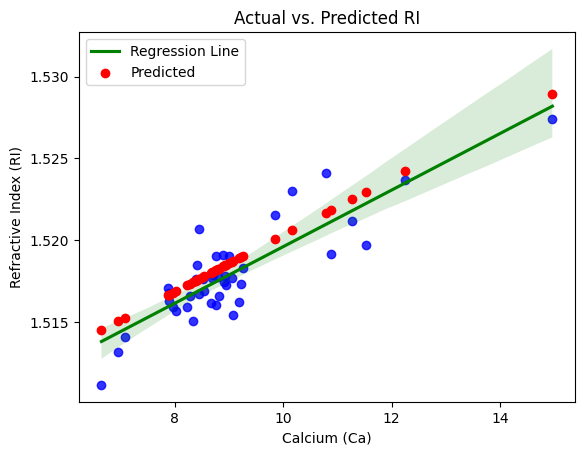

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the regression plot using Seaborn
sns.regplot(x=X_test.squeeze(), y=y_test.squeeze(), data=df2, scatter_kws={'color': 'blue', 'label': 'Actual'},
            line_kws={'color': 'green', 'label': 'Regression Line'})

# Add predicted values as red points
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Customize the plot
plt.xlabel('Calcium (Ca)')
plt.ylabel('Refractive Index (RI)')
plt.title('Actual vs. Predicted RI')
plt.legend()
plt.show()

It looks like a pretty good fit but the red dots (predictions) just follow a line.
They should be more scattered and closer to or overlapping the individual blue dots(actual values).

Let's see if we can do better.

### Try to improve our model

Use some other algorithms

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Decision Tree

In [19]:
model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.2769710013324551
Mean Absolute Error (MAE): 0.0017568023255814073
Mean Squared Error (MSE): 6.0448135174418665e-06


In [20]:
model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared: 0.4730929027201546
Mean Absolute Error (MAE): 0.00147472255444797
Mean Squared Error (MSE): 4.405155463948109e-06


Looks like our best model is still Linear Regression.

Let's try adding more features (independent variables) from our dataset and see if that will help.

In [21]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


###Multivariable Regression

Split the data into independent vatiables (X) and dependent variable (y)

In [22]:
X = df.drop(['RI', 'Type'], axis=1)
y = df['RI']

In [23]:
X.shape, y.shape

((214, 8), (214,))

Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

Instantiate, Fit, Train, Predict & Evaluate

In [25]:
mvmodel_lr = LinearRegression()

mvmodel_lr.fit(X_train, y_train)

y_pred = mvmodel_lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.8946455319613043
Mean Absolute Error (MAE): 0.0006477183157975586
Mean Squared Error (MSE): 8.808057680906846e-07


Best Single Variable Model Results:

**R-squared:**
 0.6879869650387724

**Mean Absolute Error (MAE):**
0.0013110778938730935

**Mean Squared Error (MSE):**
 2.608554587475014e-06

Cool! ... the new results look significantly better!

Here's why:

**Higher R-squared: **The R-squared value has increased from 0.6879 to 0.8946. This means that the new model (with more features) explains about 89.5% of the variance in the refractive index ('RI'), compared to only 68.8% explained by our previous model. A higher R-squared generally indicates a better fit to the data.

**Lower MAE and MSE:** Both the MAE and MSE have decreased substantially. This means our new model's predictions are, on average, closer to the actual values, resulting in smaller errors.

**Reasons for Improvement:**

More Information: By including more features, we've provided our model with more information to learn from. This has likely allowed it to capture more complex relationships between the features and the target variable ('RI').


Let's visualize it!

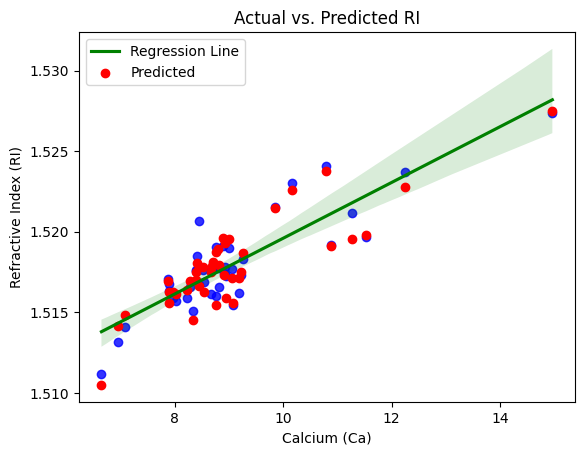

In [26]:
sns.regplot(x=X_test['Ca'], y=y_test, data=df, scatter_kws={'color': 'blue', 'label': 'Actual'},
            line_kws={'color': 'green', 'label': 'Regression Line'})

plt.scatter(X_test['Ca'], y_pred, color='red', label='Predicted')

plt.xlabel('Calcium (Ca)')
plt.ylabel('Refractive Index (RI)')
plt.title('Actual vs. Predicted RI')
plt.legend()
plt.show()

Our red and blue points are much closer together. Some even overlap. In our first plot the red just kind of followed a line.  This is indicates a much better fit!!!

### Let's try the Decision Tree and Random Forest algorithms.###

In [27]:
mvmodel_dt = DecisionTreeRegressor()

mvmodel_dt.fit(X_train, y_train)

y_pred = mvmodel_dt.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.8044168962443484
Mean Absolute Error (MAE): 0.000835348837209296
Mean Squared Error (MSE): 1.6351534883720657e-06


In [28]:
mvmodel_rf = RandomForestRegressor()

mvmodel_rf.fit(X_train, y_train)

y_pred = mvmodel_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

R-squared: 0.7859579619898747
Mean Absolute Error (MAE): 0.0007818744186045659
Mean Squared Error (MSE): 1.7894776102325223e-06


The Linear regression with multiple independent variables seems to be our best model.  Keep exploring the features and adjust the parameters and algorithms and see if you can do better.  

*The only way to learn is to practice.*